# Tidal analysis

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy import interpolate


#  Check the time difference

In [71]:
file = "Annual_Predictions_Stag Island_2020.csv"
df= pd.read_csv(file)

df['Date and time (EST)']= pd.to_datetime(df['Date and time (EST)'])
df['next_time'] = pd.to_datetime(df['Date and time (EST)'].shift(1))
df['Time difference'] = df['Date and time (EST)'] - df['next_time']

df.head(1:10)

SyntaxError: invalid syntax (484379697.py, line 8)

# 1 year

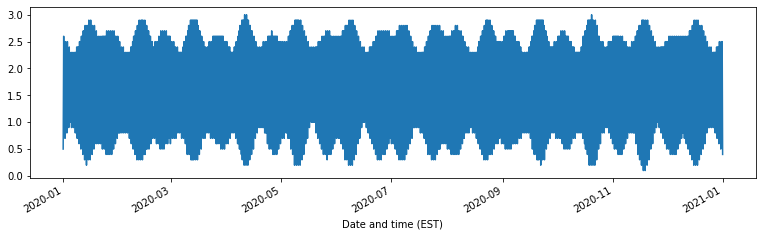

In [64]:
file = "Annual_Predictions_Stag Island_2020.csv"
df= pd.read_csv(file, index_col=0, parse_dates=True)

water_level = df['Metres']['2020-01-01':]
x = water_level.plot(figsize=(13, 3.5))

# Q1 year

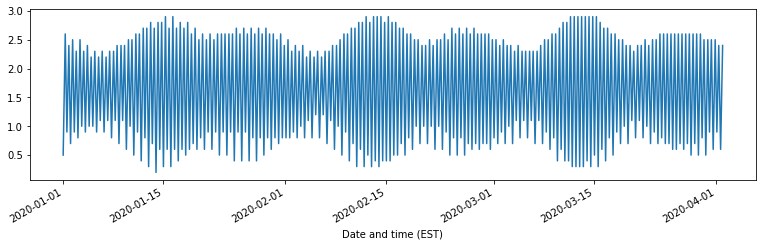

In [65]:
water_level = df['Metres']['2020-01-01':'2020-04-01']
x = water_level.plot(figsize=(13, 3.5))

# 5 days

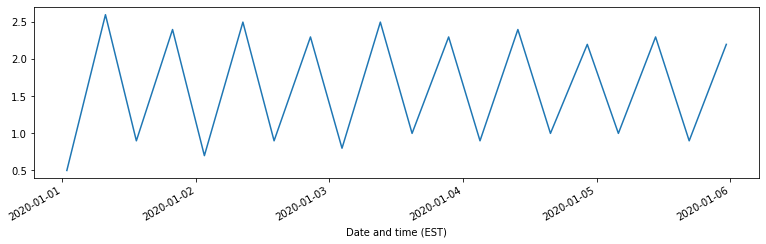

In [66]:
water_level = df['Metres']['2020-01-01':'2020-01-05']
x = water_level.plot(figsize=(13, 3.5))

# Timeseries interpolation 

/tmp/ipykernel_21795/144838799.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
/tmp/ipykernel_21795/144838799.py:10: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df = read_csv('Annual_Predictions_Stag Island_2020.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)


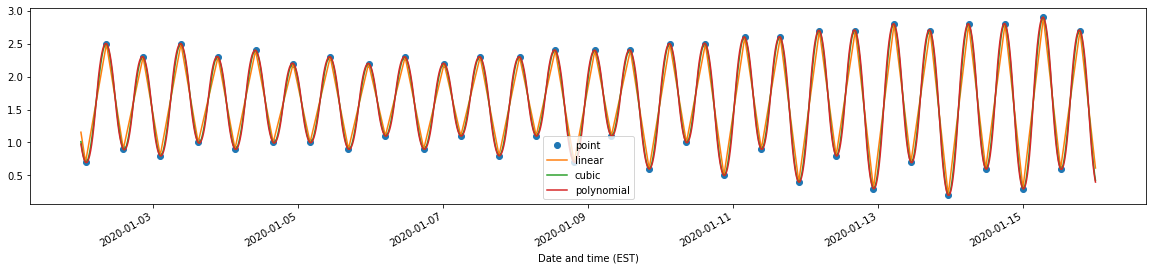

In [70]:
from pandas import read_csv
from pandas import datetime
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt

date_start= '2020-01-02'
date_end = '2020-01-15'
 
df = read_csv('Annual_Predictions_Stag Island_2020.csv', header=0, parse_dates=[0], index_col=0, squeeze=True) 
df = pd.DataFrame(df)

df_cubic = df.resample('1Min').first().interpolate(method='cubic')
df_cubic = pd.DataFrame(df_cubic)

df_linear = df.resample('1Min').first().interpolate(method='linear')
df_linear = pd.DataFrame(df_linear)

df_polynomial = df.resample('1Min').first().interpolate(method='polynomial', order=2)
df_polynomial = pd.DataFrame(df_polynomial)

plt.figure().set_figwidth(20)

plt.plot(df['Metres'][date_start:date_end], 'o')
df_linear['Metres'][date_start:date_end].plot()
df_cubic['Metres'][date_start:date_end].plot()
df_polynomial['Metres'][date_start:date_end].plot()

plt.legend(['point', 'linear', 'cubic', 'polynomial'], loc = 'best')
plt.show()


# Save data

In [60]:
df_linear.to_csv('linear_2020.csv',index=True, float_format='%.2f')
df_cubic.to_csv('cubic_2020.csv',index=True, float_format='%.2f')
df_polynomial.to_csv('df_polynomial_2020.csv',index=True,float_format='%.2f')